# Business Understanding

Firstly, I brought 3 questions to explore throughout the data. 
  1. What's the target market of Stackoverflow?
  2. What are the most popular platforms and languages among the Employed Professional Developers?
  3. What relates to the Employed Professional Developers' job satisfaction?

# Data Understanding

Here we used the StackOverflow data to attempt to answer our questions of interest. 
To get started, let's read in the necessary python libraries and data.
First, let's take a look at the data.

In [181]:
import numpy as np
import pandas as pd
from collections import defaultdict
import matplotlib.pyplot as plt
import HowToBreakIntoTheField as t
%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

df = pd.read_csv('./survey_results_public.csv')
schema = pd.read_csv('./survey_results_schema.csv')
df.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
df.shape

(19102, 154)

# Question 1

In order to understand the features of Stackoverflow's users, we will look at the the Professional, EmploymentStatus. Use get_description function below to take a closer look at the definiation of them.
Provide a pandas series of the different Professional and EmploymentStatus status values in the dataset. 
Plot bar charts of the proportion of individuals in each status. 

In [22]:
def get_description(column_name, schema=schema):
    '''
    function is used to check the definition of columns in df 
    INPUT - schema - pandas dataframe with the schema of the developers survey
            column_name - string - the name of the column you would like to know about
    OUTPUT - 
            desc - string - the description of the column
    '''
    desc = list(schema[schema['Column'] == column_name]['Question'])[0]
    return desc


In [28]:
# check the schema contents for 2 fields
a = get_description('Professional')
b = get_description('EmploymentStatus')
print('Professional means {}\nEmploymentStatus means {}'.format(a,b))

Professional means Which of the following best describes you?
EmploymentStatus means Which of the following best describes your current employment status?


In [29]:
# check Nah in 2 fields
a = sum(df['Professional'].isnull())  # 0 missing values
b = sum(df['EmploymentStatus'].isnull())  # 0 missing values
print('{} missing values'.format(a+b) )

0 missing values


In [53]:
# check the category items of 2 fields
cat_pro = list(df.Professional.value_counts().sort_values(ascending = False).index)
cat_epl = list(df.EmploymentStatus.value_counts().sort_values(ascending = False).index)
print(cat_pro,cat_epl)

['Professional developer', 'Student', 'Professional non-developer who sometimes writes code', 'None of these', 'Used to be a professional developer'] ['Employed full-time', 'Independent contractor, freelancer, or self-employed', 'Employed part-time', 'Not employed, and not looking for work', 'Not employed, but looking for work', 'I prefer not to say', 'Retired']


In [104]:
#Data transform

# Divide user into employed and unemployed 
df['Eplyed'] = df['EmploymentStatus'].apply(lambda x:'Emp' if x in ['Employed full-time','Independent contractor, freelancer, or self-employed','Employed part-time'] else 'NoEmp')
# Divide user into professional developer and unprofessional 
df['Profl'] = df['Professional'].apply(lambda x:'Pro' if x == 'Professional developer' else 'NoPro')

df.shape

(19102, 156)

Text(0,0.5,'rate')

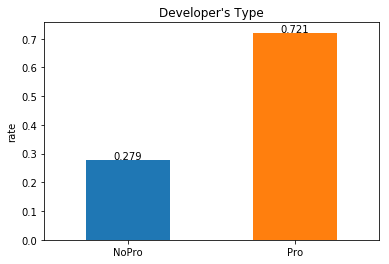

In [121]:
#bar plot show the proportion of professional developers and non-professional users
dp = df.Profl.value_counts().sort_values(ascending = True)
ttl=df.shape[0]
(dp/ttl).plot(kind="bar") 
plt.title("Developer's Type")
plt.xticks(rotation = 0)
for i in range(len(dp)):
    count = round(dp[i]/ttl,3)
    plt.text(i, count+0.03, count, ha = 'center', va='top')
plt.ylabel('rate')

Text(0,0.5,'rate')

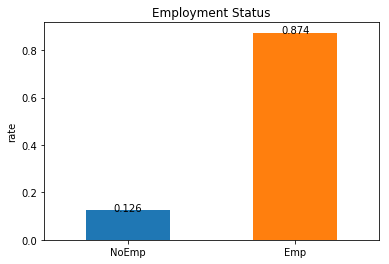

In [122]:
#bar plot show the proportion of employed and non-employed users
de = df.Eplyed.value_counts().sort_values(ascending = True)
ttl=df.shape[0]
(de/ttl).plot(kind="bar") 
plt.title("Employment Status")
plt.xticks(rotation = 0)
for i in range(len(de)):
    count = round(de[i]/ttl,3)
    plt.text(i, count+0.03, count, ha = 'center', va='top')
plt.ylabel('rate')

Text(0.5,0,'Status')

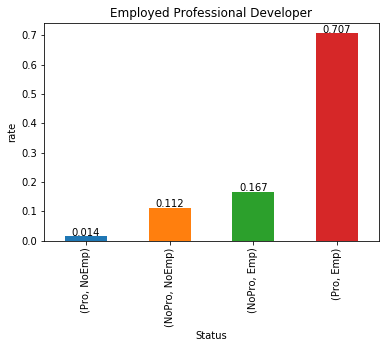

In [123]:
# Different rate of 'pro'/'nonpro' and 'Employed'/'NonEmployed'
dpe = df.groupby(['Profl','Eplyed']).size().sort_values(ascending = True)
ttl=df.shape[0]
(dpe/ttl).plot(kind='bar')
plt.title("Employed Professional Developer")
for i in range(len(dpe)):
    count = round(dpe[i]/ttl,3)
    plt.text(i, count+0.03, count, ha = 'center', va='top')
plt.ylabel('rate')
plt.xlabel('Status')

In [ ]:
print('The above diagrams show that more than 70% of all the Stackoverflow users are professional developers, and about 87% users are working.
      Totally, about 70% are employed profession developers.Besides, many amateur programers are using this platform. It can be 
      explained as they can find some solutions here for their works or for their hobbies.In the other hand, only 1.4 users are unemployed programer.
      This inplies that the platform does not give them sufficient useful information. Generally, the plat form tend to practical resource 
      since most users are busy salaryman. Most questions and solutions are reliable, since most users are professionnal developers.')

# 2. What are the most popular platforms and Database among the Employed Professional Developers?

Let's take a closer look at the HaveWorkedLanguage and WantWorkLanguage column, HaveWorkedFramework and WantWorkFramework column, HaveWorkedDatabase and WantWorkDatabase column, and HaveWorkedPlatform and WantWorkPlatform column with 'Professional Employed Developers'data. 

In [142]:
#get Employed professional Developers' data
df_EP = df[df.Profl== 'Pro']
df_EP = df_EP[df_EP.Eplyed == 'Emp']
df_EP.shape

(13498, 156)

In [176]:
# Choose the fields for compare
sub1 = df_EP[['HaveWorkedDatabase','WantWorkDatabase']]
sub2 = df_EP[['HaveWorkedPlatform', 'WantWorkPlatform']]
     
# remove missing value of the 'database' and 'platform'
sub1_rm = sub1.dropna(how = 'any', subset=['HaveWorkedDatabase','WantWorkDatabase'])
sub2_rm = sub2.dropna(how = 'any', subset=['HaveWorkedPlatform','WantWorkPlatform'])

In [177]:
possible_vals1 = ['Cassandra','MongoDB','Redis','SQL Server','MySQL','PostgreSQL','Oracle','SQLite']

def clean_and_plot_sub1(df, plot=True):
    '''
    INPUT 
        df - a dataframe holding the SelfTaughtTypes column
        title - string the title of your plot
        axis - axis object
        plot - bool providing whether or not you want a plot back
        
    OUTPUT
        study_df - a dataframe with the count of how many individuals
        Displays a plot of pretty things related to the SelfTaughtTypes column.
    '''
    study1 = df['HaveWorkedDatabase'].value_counts().reset_index()
    study1.rename(columns={'index': 'method', 'HaveWorkedDatabase': 'count'}, inplace=True)
    study_df1 = t.total_count(study1, 'method', 'count', possible_vals3)
    
    study2 = df['WantWorkDatabase'].value_counts().reset_index()
    study2.rename(columns={'index': 'method', 'WantWorkDatabase': 'count'}, inplace=True)
    study_df2 = t.total_count(study2, 'method', 'count', possible_vals3)

    study_df1.set_index('method', inplace=True)
    study_df2.set_index('method', inplace=True)
    if plot:
        (study_df1/study_df1.sum()).plot(kind='bar', legend=None);
        plt.title('Worked Database');
        plt.show()
        (study_df2/study_df2.sum()).plot(kind='bar', legend=None,color='#d65f5f');
        plt.title('Want Database');
        plt.show()
    props_study_df = (study_df1/study_df1.sum(),study_df2/study_df2.sum())
    return props_study_df

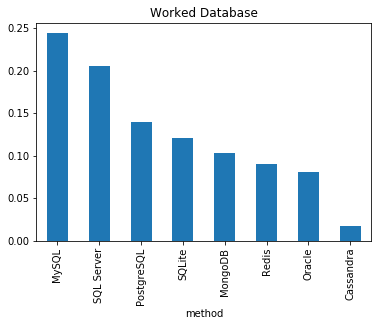

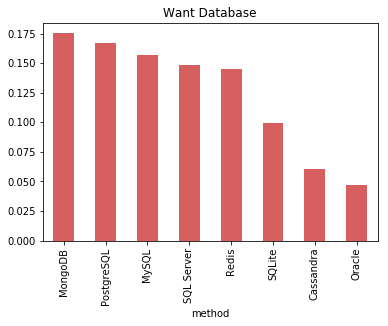

(               count
 method              
 MySQL       0.243590
 SQL Server  0.205486
 PostgreSQL  0.139163
 SQLite      0.121043
 MongoDB     0.103567
 Redis       0.090102
 Oracle      0.080289
 Cassandra   0.016760,                count
 method              
 MongoDB     0.175191
 PostgreSQL  0.167199
 MySQL       0.156637
 SQL Server  0.148645
 Redis       0.145101
 SQLite      0.099514
 Cassandra   0.060389
 Oracle      0.047325)

In [178]:
clean_and_plot_sub1(sub1_rm)

In [179]:
possible_vals2 = ['Android','iOS','Windows Phone','Windows Desktop','Linux Desktop','Mac OS','Amazon Web Services (AWS)','Some other cloud platform (e.g. Google App Engine, Bluemix, Predix, etc.)']

def clean_and_plot_sub2(df, plot=True):
    '''
    INPUT 
        df - a dataframe holding the SelfTaughtTypes column
        title - string the title of your plot
        axis - axis object
        plot - bool providing whether or not you want a plot back
        
    OUTPUT
        study_df - a dataframe with the count of how many individuals
        Displays a plot of pretty things related to the SelfTaughtTypes column.
    '''
    study1 = df['HaveWorkedPlatform'].value_counts().reset_index()
    study1.rename(columns={'index': 'method', 'HaveWorkedPlatform': 'count'}, inplace=True)
    study_df1 = t.total_count(study1, 'method', 'count', possible_vals4)
    
    study2 = df['WantWorkPlatform'].value_counts().reset_index()
    study2.rename(columns={'index': 'method', 'WantWorkPlatform': 'count'}, inplace=True)
    study_df2 = t.total_count(study2, 'method', 'count', possible_vals4)

    study_df1.set_index('method', inplace=True)
    study_df2.set_index('method', inplace=True)
    if plot:
        (study_df1/study_df1.sum()).plot(kind='bar', legend=None);
        plt.title('Worked Platform');
        plt.show()
        (study_df2/study_df2.sum()).plot(kind='bar', legend=None,color='#d65f5f');
        plt.title('Want Platform');
        plt.show()
    props_study_df = (study_df1/study_df1.sum(),study_df2/study_df2.sum())
    return props_study_df

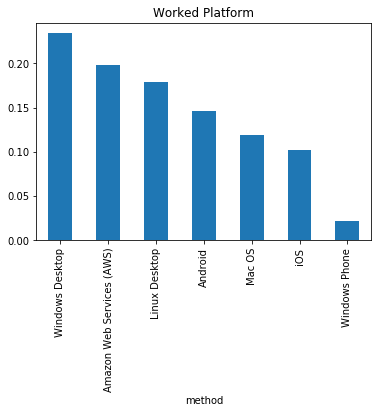

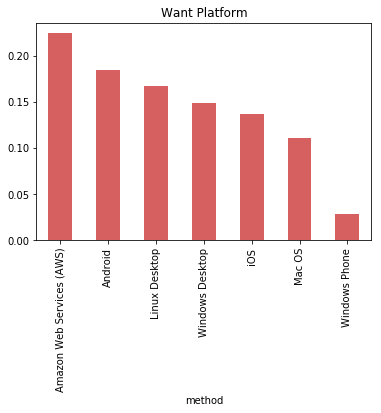

(                              count
 method                             
 Windows Desktop            0.234187
 Amazon Web Services (AWS)  0.198233
 Linux Desktop              0.178357
 Android                    0.145848
 Mac OS                     0.119435
 iOS                        0.102473
 Windows Phone              0.021466,                               count
 method                             
 Amazon Web Services (AWS)  0.224552
 Android                    0.184376
 Linux Desktop              0.167397
 Windows Desktop            0.148266
 iOS                        0.136628
 Mac OS                     0.110562
 Windows Phone              0.028218)

In [180]:
clean_and_plot_sub2(sub2_rm)

In [28]:
print('The top 3 Databases change from worked to wanted: MySQL > SQL Server > PostgreSQL -> MongoDB > MySQL > PostgreSQL',
             'The top 3 Platforms change from worked to wanted: Windows Desktop>Linux Desktop> AWS -> AWS>Android>Linux Desktop.'
) 

{'The top 3 Databases change from worked to wanted: MySQL > SQL Server > PostgreSQL -> MongoDB > MySQL > PostgreSQL', 'The top 3 programming Languages change from worked to wanted: Javascript>C>SQL -> C>Javascript>Python', 'The top 3 Frameworks: AngularJS,React,.NET Core', 'The top 3 Platforms change from worked to wanted: Windows Desktop>Linux Desktop> AWS -> AWS>Android>Linux Desktop.'}


# 3.What relates to the Employed Professional Developers' job satisfaction?

Let's take a closer look at only quantity variables ('CareerSatisfaction', 'JobSatisfaction', 'HoursPerWeek', 'Salary') with 'Professional Employed Developers'data. 

In [185]:
# choose quantity variables
df.select_dtypes(include=['float', 'int']).columns

Index(['Respondent', 'CareerSatisfaction', 'JobSatisfaction', 'HoursPerWeek',
       'StackOverflowSatisfaction', 'Salary', 'ExpectedSalary'],
      dtype='object')

Using the num_vars dataframe from drop the missing values of the response (JobSatisfaction) - store this in drop_sal_df, then impute the values for all the other missing values with the mean of the column - store this in fill_df.

In [310]:
#Only use quant variables and drop any rows with missing values
num_vars = df_EP[['Salary', 'ExpectedSalary', 'CareerSatisfaction', 'HoursPerWeek', 'JobSatisfaction']]
#df_dropna = num_vars.dropna(axis=0)
drop_sal_df= num_vars.dropna(subset=['JobSatisfaction'], axis=0) #Drop the rows with missing 'JobSatisfaction'
drop_sal_df = drop_sal_df.dropna(how='all', axis=1)# Drop all-Nan columns

In [307]:
# turning Model
#import math
#drop_sal_df['HoursPerWeek'] = drop_sal_df['HoursPerWeek'].apply(lambda x: x**3 if x>0 else 0)

In [311]:
fill_mean = lambda col: col.fillna(col.mean()) # Mean function
fill_df = drop_sal_df.apply(fill_mean, axis=0) #Fill all missing values with the mean of the column.

# Model and Results
We use linear regression model, since all the variables are quantity. The r-squared score of the model are used to evaluate the results.

In [312]:
#Split into explanatory and response variables
X = fill_df.drop('JobSatisfaction',axis = 1)
y = fill_df['JobSatisfaction']

#Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=1) 

lm_model = LinearRegression() # Instantiate
lm_model.fit(X_train, y_train) #Fit
        
#Predict and score the model
y_train_preds = lm_model.predict(X_train) 
y_test_preds = lm_model.predict(X_test) 
#Rsquared 
rsquared_score_train = r2_score(y_train, y_train_preds)
rsquared_score_test = r2_score(y_test, y_test_preds)
#length_y_test = len(y_test)

"The r-squared score for your model was {} on test data,{} on training data.".format(rsquared_score_test,rsquared_score_train)

'The r-squared score for your model was 0.39532192323229065 on test data,0.41702017085622967 on training data.'

In [210]:
lm_model.coef_

array([  1.27547948e-06,   7.48732162e-01,  -1.49725343e-02])